<a href="https://colab.research.google.com/github/qwertymasterkey/captcha_recognition/blob/main/captcha_segmentation_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
!unzip /content/drive/MyDrive/captcha_segment/dataset_archive.zip -d /content/drive/MyDrive/captcha_segment/tenletter_dataset/

In [ ]:
from pathlib import Path
data_dir = Path("/content/drive/MyDrive/captcha_segment/tenletter_dataset")

In [ ]:
images = sorted(list(map(str, list(data_dir.glob("*.jpg")))))

In [ ]:
labels = [img.split(os.path.sep)[-1].split(".jpg")[0] for img in images]
characters = set(char for label in labels for char in label)
print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 282
img_height = 90

Number of images found:  10000
Number of labels found:  10000
Number of unique characters:  62
Characters present:  {'7', '4', 'Q', 'y', 'P', 'p', 'E', 'u', 't', 'Z', '8', 'w', 'a', 'i', '0', 'c', 'b', '6', 'G', 'x', 'e', 'k', 'z', 'm', 'S', 'C', 'H', 's', 'Y', 'F', 'o', 'K', 'h', 'l', 'J', '2', 'W', 'X', 'D', 'V', 'L', 'd', 'N', 'A', 'n', 'j', 'M', 'B', '9', '5', 'r', 'U', 'v', 'f', 'I', 'q', '1', '3', 'g', 'O', 'T', 'R'}


In [ ]:
print(labels[5])

00TDWu131v


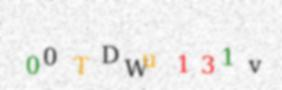

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
images[5]
image1=cv2.imread(images[5])
cv2_imshow(image1)

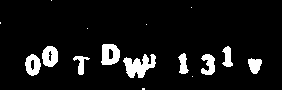

In [ ]:
def convert_binary(image):
  image1 = cv2.imread(image)
  img = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  ret, thresh1 = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY_INV)
  return thresh1
thresh1=convert_binary(images[5])
cv2_imshow(thresh1)


In [ ]:
def find_contours(thresh1):
  contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  return contours
contours=find_contours(thresh1)
image = cv2.drawContours(image1, contours, -1, (0, 255, 0), 2)

In [ ]:
print(contours)

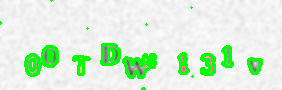

In [ ]:
cv2_imshow(image)

In [ ]:
def find_contour_size(contours):
  x={}
  for m in range(len(contours)):
      
      mini = 1000
      for k in range(len(contours[m])):
          first = contours[m][k][0][1]
          if first < mini:
              mini = first
      mini2 = mini
      #print(mini2)
      
      maxi = 0
      for k in range(len(contours[m])):
          first = contours[m][k][0][1]
          if first > maxi:
              maxi = first
      maxi2 = maxi
      #print(maxi2)
      x[m] = maxi2 - mini2
  return x 
x=find_contour_size(contours)

In [ ]:
biggie = sorted(x, key=x.get)

In [ ]:
print(biggie)

[1, 14, 15, 17, 18, 0, 16, 7, 11, 13, 2, 3, 4, 8, 9, 10, 12, 6, 5]


In [ ]:
def plotting(num,s,biggie,contours):
    m = biggie[num]
    mini = 1000
    for k in range(len(contours[m])):
        first = contours[m][k][0][0]
        if first < mini:
            mini = first
    mini1 = mini
    #print(mini1)

    mini = 1000
    for k in range(len(contours[m])):
        first = contours[m][k][0][1]
        if first < mini:
            mini = first
    mini2 = mini
   # print(mini2)

    maxi = 0
    for k in range(len(contours[m])):
        first = contours[m][k][0][1]
        if first > maxi:
            maxi = first
    maxi2 = maxi
    #print(maxi2)

    maxi = 0
    for k in range(len(contours[m])):
        first = contours[m][k][0][0]
        if first > maxi:
            maxi = first
    maxi1 = maxi
    #print(maxi1)
    ret = [mini2, maxi2, mini1, maxi1]
    s[num] = mini1
    return ret

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

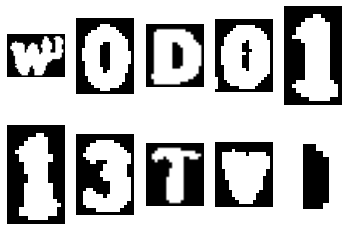

In [ ]:
def plotting_characters(s,biggie,contours):
  fig, axs = plt.subplots(2, 5)
  wow = plotting(-1,s,biggie,contours)
  axs[0, 0].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,0].axis('off')
  wow = plotting(-2,s,biggie,contours)
  axs[0, 1].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,1].axis('off')
  wow = plotting(-3,s,biggie,contours)
  axs[0,2].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,2].axis('off')
  wow = plotting(-4,s,biggie,contours)
  axs[0,3].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,3].axis('off')
  wow = plotting(-5,s,biggie,contours)
  axs[0,4].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,4].axis('off')
  wow = plotting(-6,s,biggie,contours)
  axs[1,0].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,0].axis('off')
  wow = plotting(-7,s,biggie,contours)
  axs[1,1].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,1].axis('off')
  wow = plotting(-8,s,biggie,contours)
  axs[1,2].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,2].axis('off')
  wow = plotting(-9,s,biggie,contours)
  axs[1,3].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,3].axis('off')
  wow = plotting(-10,s,biggie,contours)
  axs[1,4].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,4].axis('off')
biggie = sorted(x, key=x.get)
s={}
plotting_characters(s,biggie,contours)


In [ ]:
siggie = sorted(s, key=s.get)
print(biggie[siggie[0]])

6


In [ ]:
def borders_left_to_right(num,siggie,contours):
    m = biggie[siggie[num]]
    mini = 1000
    for k in range(len(contours[m])):
        first = contours[m][k][0][0]
        if first < mini:
            mini = first
    mini1 = mini
    #print(mini1)

    mini = 1000
    for k in range(len(contours[m])):
        first = contours[m][k][0][1]
        if first < mini:
            mini = first
    mini2 = mini
   # print(mini2)

    maxi = 0
    for k in range(len(contours[m])):
        first = contours[m][k][0][1]
        if first > maxi:
            maxi = first
    maxi2 = maxi
    #print(maxi2)

    maxi = 0
    for k in range(len(contours[m])):
        first = contours[m][k][0][0]
        if first > maxi:
            maxi = first
    maxi1 = maxi
    #print(maxi1)
    ret = [mini2, maxi2, mini1, maxi1]
    return ret

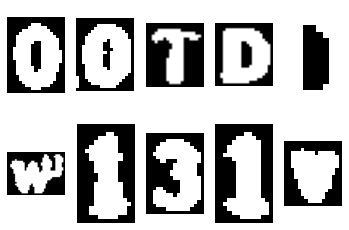

In [ ]:
def plotting_left_to_right(siggie,contours):
  fig, axs = plt.subplots(2, 5)
  wow = borders_left_to_right(0,siggie,contours)
  axs[0, 0].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,0].axis('off')
  wow = borders_left_to_right(1,siggie,contours)
  axs[0, 1].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,1].axis('off')
  wow = borders_left_to_right(2,siggie,contours)
  axs[0,2].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,2].axis('off')
  wow = borders_left_to_right(3,siggie,contours)
  axs[0,3].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,3].axis('off')
  wow = borders_left_to_right(4,siggie,contours)
  axs[0,4].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[0,4].axis('off')
  wow = borders_left_to_right(5,siggie,contours)
  axs[1,0].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,0].axis('off')
  wow = borders_left_to_right(6,siggie,contours)
  axs[1,1].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,1].axis('off')
  wow = borders_left_to_right(7,siggie,contours)
  axs[1,2].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,2].axis('off')
  wow = borders_left_to_right(8,siggie,contours)
  axs[1,3].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,3].axis('off')
  wow = borders_left_to_right(9,siggie,contours)
  axs[1,4].imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
  axs[1,4].axis('off')
plotting_left_to_right(siggie,contours)

In [ ]:
labels[5]

'00TDWu131v'

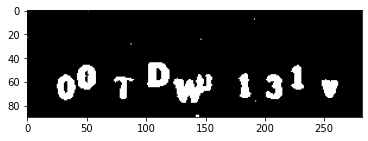

In [ ]:
plt.imshow(thresh1,cmap='gray')

In [ ]:
def checkforerror(wow):
    white = cv2.countNonZero(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2])
    total = (thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2]).shape[0] * (thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2]).shape[1]
    div = white/total
    if div > 0.63: 
        if (wow[1] - wow[0]) - (wow[3] - wow[2]) > -5:
            return True
    elif div < 0.29:
        return True
    else: return False
def checkforerrorout(wow):
    white = cv2.countNonZero(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2])
    total = (thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2]).shape[0] * (thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2]).shape[1]
    div = white/total
    return div
def checkfordoubles(wow):
    if (wow[1] - wow[0]) - (wow[3] - wow[2]) < -4: 
        if checkforerrorout(wow) < 0.56: return True
    elif (wow[1] - wow[0]) - (wow[3] - wow[2]) < 1:
        if checkforerrorout(wow) < 0.40: return True
    else: return False

test 1 False
False
0.4968421052631579
False
test 2 False


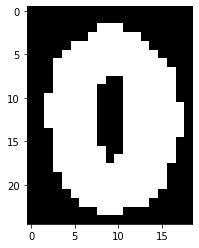

In [ ]:
wow = plotting(siggie[0],s,biggie,contours)
plt.imshow(thresh1[wow[0]-2:wow[1]+2, wow[2]-2:wow[3]+2], cmap = 'gray')
print('test 1', checkforerror(wow))
print((wow[1] - wow[0]) - (wow[3] - wow[2]) < -4)
print(checkforerrorout(wow))

print((wow[1] - wow[0]) - (wow[3] - wow[2]) < 1)
print('test 2', checkfordoubles(wow))

In [ ]:
labels[5][0]

'0'

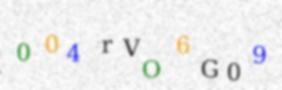

In [ ]:
test_captcha=images[0]
image1=cv2.imread(test_captcha)
cv2_imshow(image1)

In [ ]:
thresh1=convert_binary(test_captcha)
contours1=find_contours(thresh1)
x1=find_contour_size(contours1)

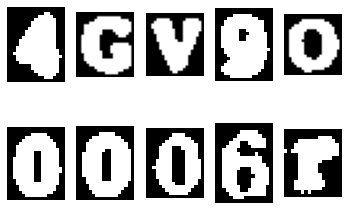

In [ ]:
biggie = sorted(x1, key=x1.get)
s={}
plotting_characters(s,biggie,contours1)

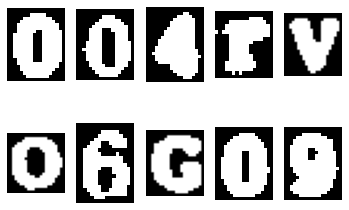

In [ ]:
siggie = sorted(s, key=s.get)
plotting_left_to_right(siggie,contours1)

In [ ]:
model_path='/content/drive/MyDrive/captcha_models/my_best_model.epoch15-loss0.10.hdf5'
from keras.models import load_model
proposed_model=load_model(model_path)

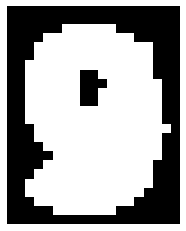

In [ ]:
from PIL import Image 
import PIL 
img1=[]
for i in range(0,10):
  wow = borders_left_to_right(i,siggie,contours1)
  img1.append(thresh1[wow[0]-2:wow[1]+2 ,wow[2]-2:wow[3]+2])
  plt.axis('off')
  plt.imshow(img1[i],cmap='gray')
  name="letter"+str(i)+".png"
  plt.savefig(name,bbox_inches='tight')

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
import numpy

In [ ]:
dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A',
       11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
       21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
       31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e',
       41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 
       51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y',
       61: 'z'}

In [ ]:
def find_letter(file_loc,rank):
  test_image = image.load_img(file_loc,target_size=(224,224))
  numpy_image = img_to_array(test_image)
  image_batch = np.expand_dims(numpy_image, axis = 0)
  predictions=proposed_model.predict(image_batch)
  k=numpy.argsort(predictions[0])
  prob.append(predictions[0][62-rank])
  return dict[k[62-rank]]

In [ ]:
result=""
prob=[]
for i in range(0,10):
  file_loc="/content/letter"+str(i)+".png"
  result_letter=find_letter(file_loc,1)
  result=result+result_letter

In [ ]:
result

'004rVO6G09'

In [ ]:
prob

[7.492279e-11,
 5.488779e-12,
 5.199694e-15,
 1.8241185e-09,
 6.704907e-10,
 4.689685e-12,
 1.5401717e-08,
 3.5986168e-12,
 0.24845378,
 1.7881623e-10]

In [ ]:
prob_sorted=numpy.argsort(prob)

In [ ]:
k=find_letter("/content/letter"+str(prob_sorted[2])+".png",3)

In [ ]:
k

'0'

In [ ]:
result

'0oAQ59vOx5'

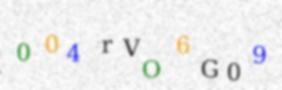

In [ ]:
cv2_imshow(image1)

In [ ]:
model_path='/content/drive/MyDrive/captcha_models/captcha_model.h5'
from keras.models import load_model
proposed_model=load_model(model_path)

KeyboardInterrupt: ignored